In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

#matplot is used for graphing and displaying plots directly within the notebook
import matplotlib.pyplot as plt
%matplotlib inline

# Any results you write to the current directory are saved as output.

In [2]:
#Initial read of data .... reating two seperate sets for the test and train data that was provided
#train will be used to develop the model and test will be used for gathering predictions and judging performance
test = pd.read_csv("../input/test.csv")
train = pd.read_csv("../input/train.csv")

In [3]:
#Change the Sex column so that male is represented by 0 and female is represented by 1 in both the test and train sets
train.Sex = train.Sex.map({'male':0 , 'female':1})
test.Sex = test.Sex.map({'male':0 , 'female':1})

In [4]:
#Dispaly data descriptions to see what columns are missing values
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#Since age is missing values, fill all the nulls with the median value as a replacement
train.Age = train.Age.fillna(28)

In [6]:
#Display top 5 of train shows that 'Sex' column now maps to 0 and 1
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#Dispaly data descriptions to see what columns are missing values
test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,0.363636,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,0.481622,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,1.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
#Since age is missing values, fill all the nulls with the median value as a replacement
test.Age = test.Age.fillna(27)
#Since Fare is missing values, fill all the nulls with the median value as a replacement
test.Fare = test.Fare.fillna(14.4542)

# Data Visualization of Train Data

### Survived vs. Died

In [9]:
#Create dataframe of only the value counts for the amount of survivors to get a general overview
survdf = train.Survived.value_counts()

[Text(0, 0, 'Died'), Text(0, 0, 'Survived')]

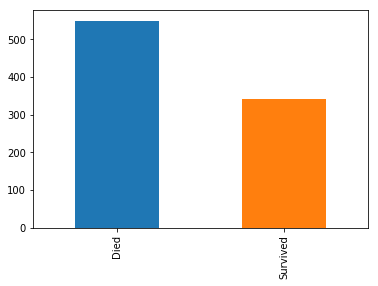

In [10]:
ax = survdf.plot.bar()
ax.set_xticklabels(['Died','Survived'])

### Age Distirbution

In [11]:
#Get count of people at each age
agedf = train.Age.value_counts()
#Drop the results into a Dataframe, resets the index, and rename columns so values make sense
agedf = pd.DataFrame(agedf)
agedf = agedf.reset_index(drop=False)
agedf = agedf.rename(columns={"index": "Age", "Age": "Count"}).sort_values('Age',ascending = True)

#Make age the index for graphing purposes
agedf = agedf.set_index('Age')


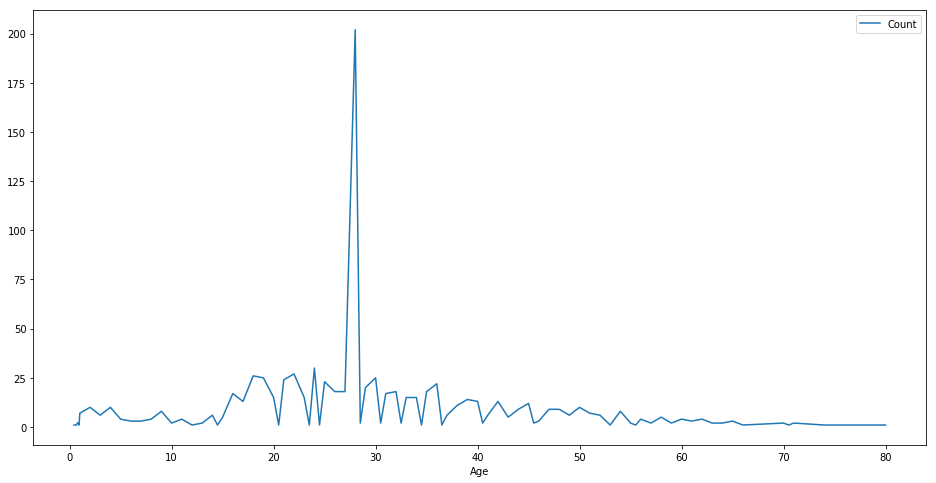

In [12]:
#Create line plot to show age distribution 
agedf.plot.line(figsize = (16,8))

### Gender and Survival Amounts

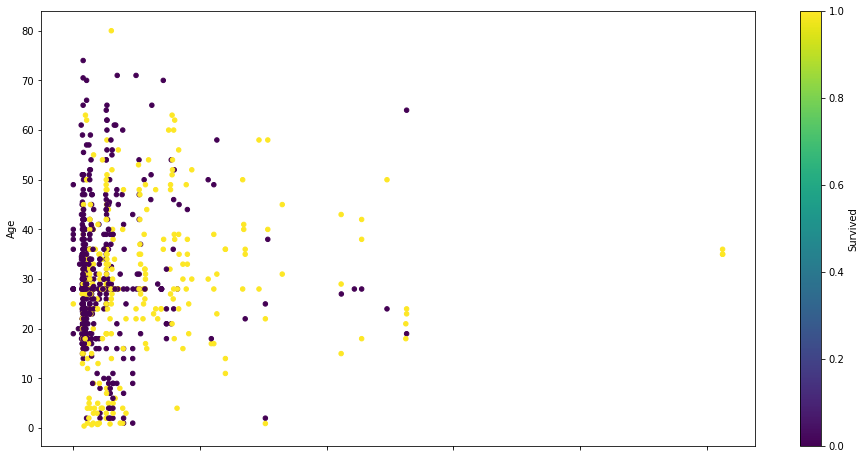

In [13]:
#The x axis is Fare, so the further to the right the more that the person paid. 
#Age runs up the Y axis and all purple dots are people who died and yellow dots survived
gendf = train[['Survived','Sex','Age','Fare']]
gendf.head()

ax2 = gendf.plot.scatter(x = 'Fare', y = 'Age', c = 'Survived',colormap='viridis',figsize = (16,8))
#Plot shows that upper class and payers of higher Fare were more likely to survive
#Low Fare passengers were also likely to survive if they were young (<10 years old)

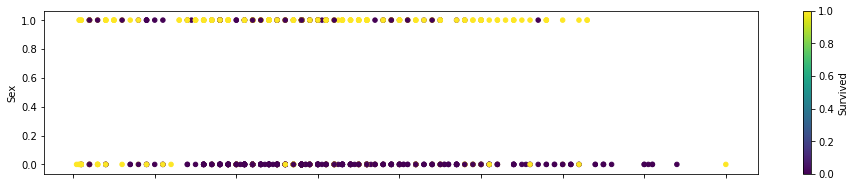

In [14]:
ax3 = gendf.plot.scatter(x = 'Age', y = 'Sex', c = 'Survived',colormap='viridis',figsize = (16,3))

#Same as above plot except now showing survived vs died using Age and Gender as axis parameters
#Top line represents females since their value within the Data is represented by 1
#Males are the bottom line as they are represented by 0
#Graph shows Females were much more likely to survive and males were only likely to survive if they were young

# Modeling a Logistic Regression
Build linear model to predict survival rate

In [15]:
from sklearn.linear_model import LogisticRegression as lr

In [16]:
lgcls = lr()

In [17]:
X_train = train[['Pclass','SibSp','Parch']]
X_test = test[['Pclass','SibSp','Parch']]

In [18]:
Y_train = train.Survived

In [19]:
lgcls.fit(X_train,Y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
pred = lgcls.predict(X_test)

In [21]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [22]:
passId = test.PassengerId

submissions = pd.DataFrame({'PassengerId' : passId, 'Survived': pred})
submissions

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,0
9,901,0


In [23]:
#submissions.to_csv('submission.txt',index=False)

# Classification Neural Net

In [36]:
#import packages needed for the NN
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [51]:
# Split Dataframe into input and output lists

#Input
X = train[['Pclass','Sex','Age','SibSp','Parch','Fare']]

#Output
Y = train.Survived

In [52]:
# Create initial model

model = Sequential()
#Creating network layers ... input_dim is set to the number of features being passed in 
#activation calls what will trigger output layers
model.add(Dense(12, input_dim=6, activation='softmax'))
model.add(Dense(8, activation='softmax'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [53]:
#model is being compiled using MSE as loss and optimzied using adam as optimizer for weight updates
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Fit the model, epochs is how many iterrations over the dataset will occur
#batch size is how often weghts are updated as data is being iterrated over
model.fit(X, Y, epochs=300, batch_size=5)

Epoch 1/300
891/891 [==============================] - 1s 1ms/step - loss: 0.2480 - acc: 0.5690
Epoch 2/300
891/891 [==============================] - 0s 317us/step - loss: 0.2430 - acc: 0.6162
Epoch 3/300
891/891 [==============================] - 0s 273us/step - loss: 0.2386 - acc: 0.6162
Epoch 4/300
891/891 [==============================] - 0s 272us/step - loss: 0.2332 - acc: 0.6543
Epoch 5/300
891/891 [==============================] - 0s 269us/step - loss: 0.2252 - acc: 0.7194
Epoch 6/300
891/891 [==============================] - 0s 267us/step - loss: 0.2153 - acc: 0.7565
Epoch 7/300
891/891 [==============================] - 0s 272us/step - loss: 0.2053 - acc: 0.7587
Epoch 8/300
891/891 [==============================] - 0s 266us/step - loss: 0.1965 - acc: 0.7767
Epoch 9/300
891/891 [==============================] - 0s 254us/step - loss: 0.1867 - acc: 0.7823
Epoch 10/300
891/891 [==============================] - 0s 247us/step - loss: 0.1787 - acc: 0.7789
Epoch 11/300
891/891 

891/891 [==============================] - 0s 247us/step - loss: 0.1313 - acc: 0.8092
Epoch 84/300
891/891 [==============================] - 0s 249us/step - loss: 0.1246 - acc: 0.8260
Epoch 85/300
891/891 [==============================] - 0s 250us/step - loss: 0.1285 - acc: 0.8204
Epoch 86/300
891/891 [==============================] - 0s 244us/step - loss: 0.1292 - acc: 0.8272
Epoch 87/300
891/891 [==============================] - 0s 247us/step - loss: 0.1271 - acc: 0.8294
Epoch 88/300
891/891 [==============================] - 0s 241us/step - loss: 0.1292 - acc: 0.8249
Epoch 89/300
891/891 [==============================] - 0s 245us/step - loss: 0.1300 - acc: 0.8137
Epoch 90/300
891/891 [==============================] - 0s 254us/step - loss: 0.1276 - acc: 0.8249
Epoch 91/300
891/891 [==============================] - 0s 246us/step - loss: 0.1256 - acc: 0.8350
Epoch 92/300
891/891 [==============================] - 0s 242us/step - loss: 0.1255 - acc: 0.8316
Epoch 93/300
891/891 [=

Epoch 165/300
891/891 [==============================] - 0s 261us/step - loss: 0.1280 - acc: 0.8249
Epoch 166/300
891/891 [==============================] - 0s 249us/step - loss: 0.1259 - acc: 0.8272
Epoch 167/300
891/891 [==============================] - 0s 262us/step - loss: 0.1287 - acc: 0.8193
Epoch 168/300
891/891 [==============================] - 0s 257us/step - loss: 0.1290 - acc: 0.8260
Epoch 169/300
891/891 [==============================] - 0s 253us/step - loss: 0.1244 - acc: 0.8283
Epoch 170/300
891/891 [==============================] - 0s 250us/step - loss: 0.1232 - acc: 0.8339
Epoch 171/300
891/891 [==============================] - 0s 266us/step - loss: 0.1279 - acc: 0.8171
Epoch 172/300
891/891 [==============================] - 0s 258us/step - loss: 0.1248 - acc: 0.8305
Epoch 173/300
891/891 [==============================] - 0s 254us/step - loss: 0.1255 - acc: 0.8272
Epoch 174/300
891/891 [==============================] - 0s 248us/step - loss: 0.1244 - acc: 0.8294


891/891 [==============================] - 0s 273us/step - loss: 0.1241 - acc: 0.8316
Epoch 247/300
891/891 [==============================] - 0s 253us/step - loss: 0.1273 - acc: 0.8182
Epoch 248/300
891/891 [==============================] - 0s 259us/step - loss: 0.1239 - acc: 0.8328
Epoch 249/300
891/891 [==============================] - 0s 252us/step - loss: 0.1240 - acc: 0.8316
Epoch 250/300
891/891 [==============================] - 0s 248us/step - loss: 0.1237 - acc: 0.8328
Epoch 251/300
891/891 [==============================] - 0s 249us/step - loss: 0.1242 - acc: 0.8305
Epoch 252/300
891/891 [==============================] - 0s 246us/step - loss: 0.1227 - acc: 0.8328
Epoch 253/300
891/891 [==============================] - 0s 255us/step - loss: 0.1223 - acc: 0.8294
Epoch 254/300
891/891 [==============================] - 0s 255us/step - loss: 0.1246 - acc: 0.8294
Epoch 255/300
891/891 [==============================] - 0s 258us/step - loss: 0.1216 - acc: 0.8294
Epoch 256/300


In [29]:
# Make predictions on the test set using fit model

#Input
X_test = test[['Pclass','Sex','Age','SibSp','Parch','Fare']]

#Use fitted model to make prediction using the test data
predictions = model.predict(X_test)

In [30]:
#insert final predictions into a DataFrame
final = pd.DataFrame(predictions)

#Rounds the values to be 0,1 values
final = final.round(decimals = 0)

final.head()

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [31]:
#Create dataframe that mirrors submission file layout containing the passenger id then the prediction
passId = test.PassengerId

submissions = pd.DataFrame({'PassengerId' : passId, 'Survived': final[0]})

In [32]:
# any predictions that were missed and left null are mapped to 0 as more people died than survived
submissions = submissions.fillna(0)
#changes the type to int to fit contest specifications
submissions.Survived = submissions.Survived.astype(int)
submissions.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [33]:
submissions.to_csv('submission.txt',index=False)